## Capturing Sample Image of people for feeding the Model and Processing Data

In [1]:
import cv2

In [7]:
def generate_dataset():
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h,x:x+w]
        return cropped_face
    
    cap = cv2.VideoCapture(0)
    img_id = 0
    
    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame), (200,200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            #file_name_path = "data/"+"biplab."+str(img_id)+".jpg"
            file_name_path = "visualization images/"+str(img_id)+'.jpg'
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2 )
            
            cv2.imshow("Cropped_Face", face)
            #if cv2.waitKey(1)==13 or int(img_id)==1000:
            if cv2.waitKey(1)==13 or int(img_id)==20:
                break
                
    cap.release()
    cv2.destroyAllWindows()
    print("Collecting pictures is completed !!!")
generate_dataset()

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\biswa\AppData\Local\Temp\ipykernel_2600\2293200719.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


## Creating Label 

In [8]:
import numpy as  np

In [9]:
def my_label(image_name):
    name = image_name.split('.')[-3]
    
    if name=="biplab":
        return np.array([1,0,0])
    elif name=="sanchari":
        return np.array([0,1,0])
    elif name=="sumi":
        return np.array([0,0,1])

## Creating Pictures into data format

In [10]:
import os
from random import shuffle
from tqdm import tqdm

In [11]:
def my_data():
    data = []
    for img in tqdm(os.listdir("Data")):
        path=os.path.join("Data",img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        data.append([np.array(img_data), my_label(img)])
    shuffle(data)  
    return data

In [12]:
data = my_data()

100%|████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 1824.58it/s]


## Splitting Data set into Training & Testing Data set 

In [13]:
train = data[:2400]  
test = data[2400:]
X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(X_test.shape)
y_test = [i[1] for i in test]

(2400, 50, 50, 1)
(600, 50, 50, 1)


## Creating Model now

In [14]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [37]:
tf.compat.v1.reset_default_graph()
convnet = input_data(shape=[None, 50, 50, 1])

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 3, activation='softmax')

convnet = regression(convnet, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')
model = tflearn.DNN(convnet, tensorboard_verbose=1)

X_train = X_train.reshape([-1, 50, 50, 1])
X_test = X_test.reshape([-1, 50, 50, 1])

model.fit(X_train, y_train, n_epoch=12, validation_set=(X_test, y_test), show_metric=True, run_id="FRS")


Training Step: 455  | total loss: 0.12351 | time: 2.100s
| Adam | epoch: 012 | loss: 0.12351 - acc: 0.9904 -- iter: 2368/2400
Training Step: 456  | total loss: 0.11135 | time: 3.173s
| Adam | epoch: 012 | loss: 0.11135 - acc: 0.9913 | val_loss: 0.00271 - val_acc: 1.0000 -- iter: 2400/2400
--


### <u>After Training the model </u>
### Validation Accuracy = 1.00
### Validation Loss = 0.00271

# ___________________________________________

#   
# <u> Now visualize the data and make prediction </u>

#### For collecting Images for Visualization, run the above cell again which contains the function "generate_dataset( )" and before running the cell just change the "file_name_path" variable to a new directory which will contain the Image for visualization.

In [38]:
def visualization_Data():
    Vdata = []
    for img in tqdm(os.listdir("visualization images")):
        path = os.path.join("visualization images", img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata

In [39]:
Vdata = visualization_Data()

100%|████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 1875.09it/s]


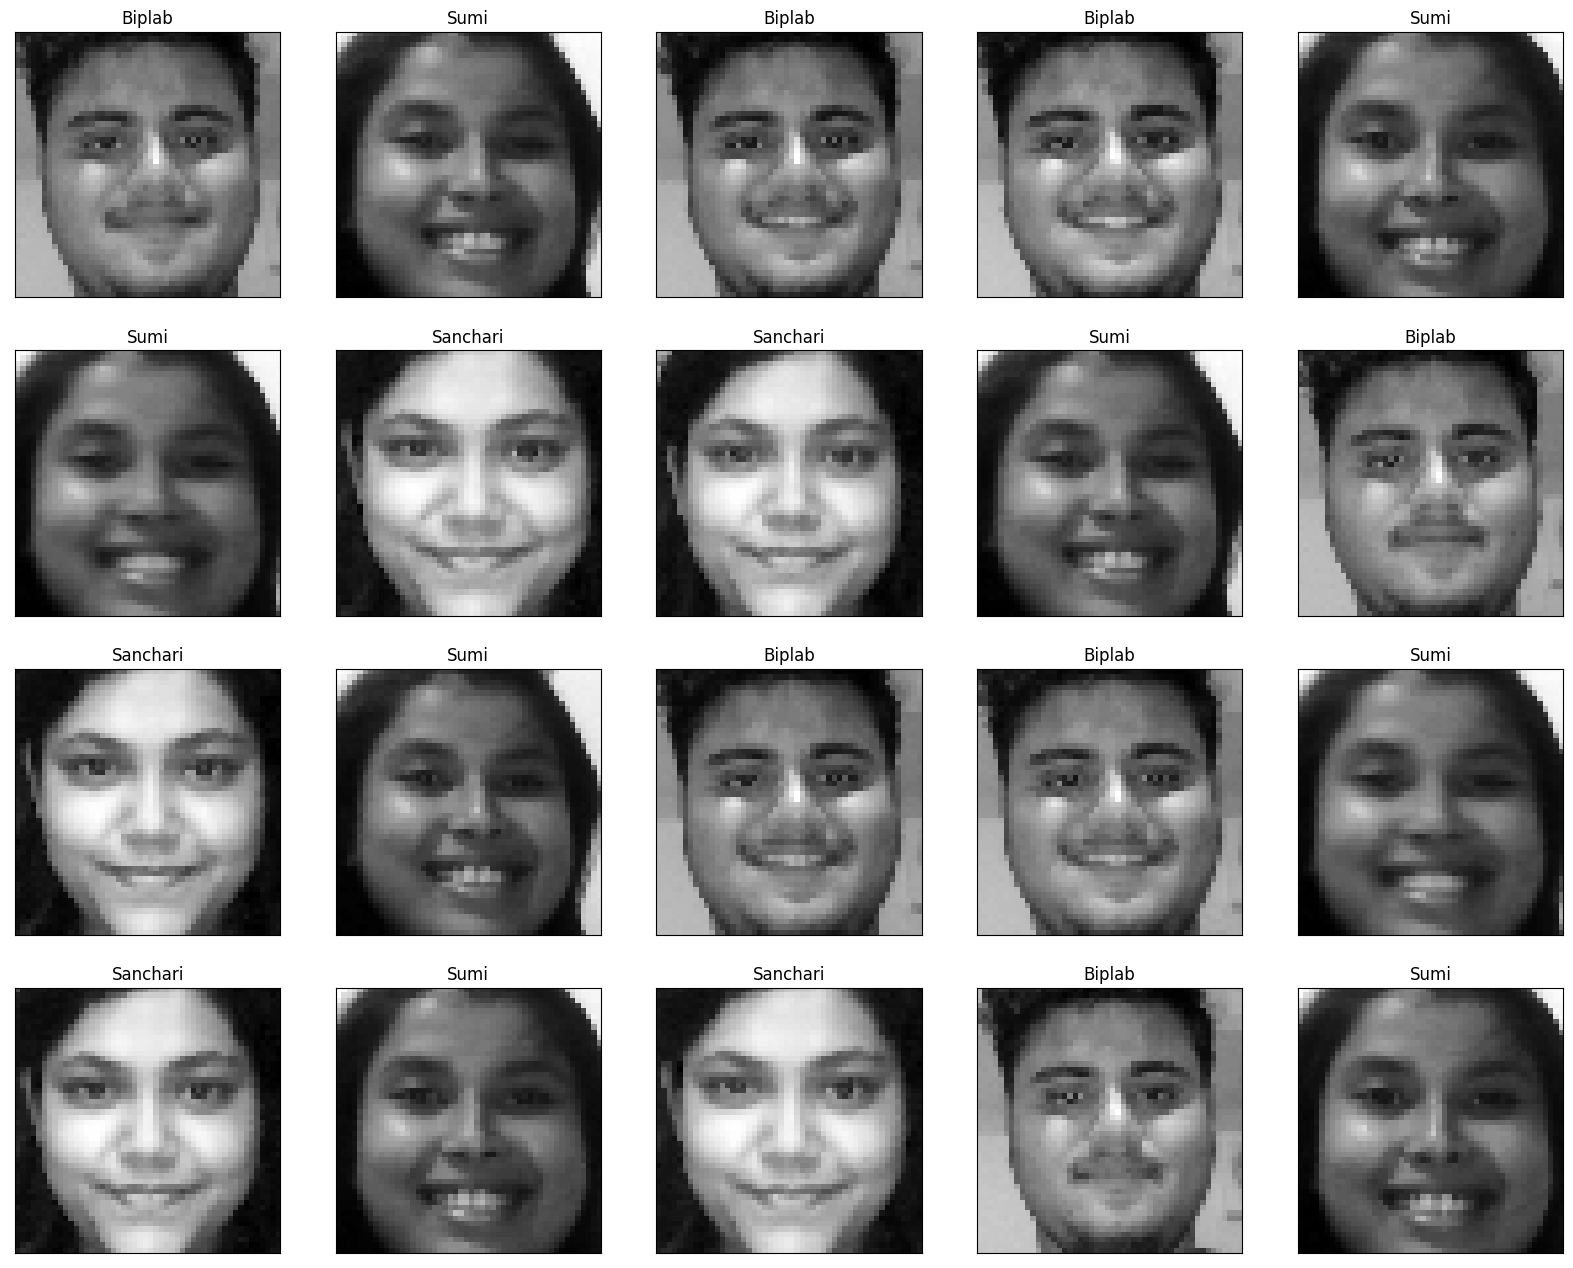

In [40]:
import matplotlib.pyplot as plt  

fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 0:
        my_label = 'Biplab'
    elif np.argmax(model_out) == 1:
        my_label = 'Sanchari'
    else:
        my_label = 'Sumi'
        
    y.imshow(image, cmap='gray')
    plt.title(my_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

## Confusion Matrix

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

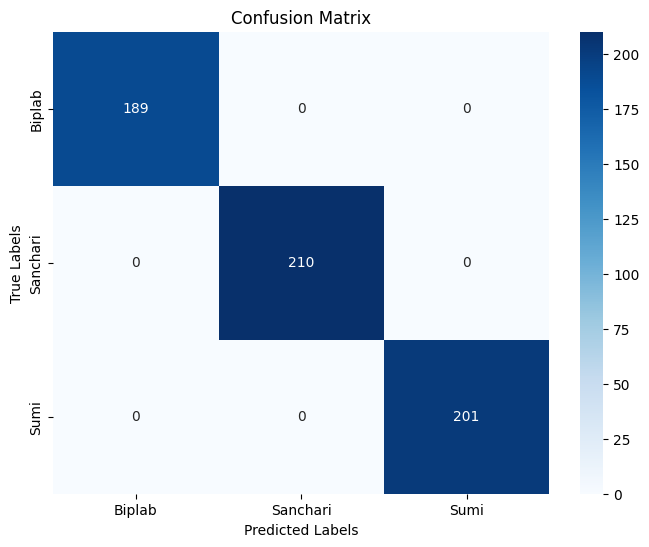

In [49]:

y_pred = []
for data in X_test:
    prediction = model.predict([data])[0]
    predicted_label = np.argmax(prediction)
    y_pred.append(predicted_label)

y_true = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_true, y_pred)


class_labels = ['Biplab', 'Sanchari', 'Sumi']


fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)


ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()